In [1]:


from util import *
from logistic_np import *
from keras.models import Model, Sequential
from keras.layers import Dense,InputLayer, LeakyReLU, BatchNormalization, Input
from keras.callbacks import EarlyStopping
# from EDA import myEDA
from keras.datasets import mnist
# from keras.optimizers import Adamax, Adam, Nadam, SGD
from matplotlib import pyplot as plt

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data() #for hand writing
print(X_train.shape)
X_train, X_test = normalize_all_pixel(X_train,X_test)

X_train  = reshape2D(X_train)

X_test = reshape2D(X_test)

print(X_train.shape[1])
encoder_dim = X_train.shape[1]//2
print(encoder_dim)
print(X_train.shape)
print(y_test)

(60000, 28, 28)
784
392
(60000, 784)
[7 2 1 ... 4 5 6]


In [3]:
Encoder = Sequential([
    InputLayer(input_shape=X_train.shape[1:]),
    Dense(encoder_dim),
    # Dropout(0.2),
    BatchNormalization(),
    LeakyReLU(),
    Dense(encoder_dim),
    Dense(encoder_dim//2)], name="Encoder")
Encoder.summary()



Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 batch_normalization (BatchN  (None, 392)              1568      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 196)               77028     
                                                                 
Total params: 540,372
Trainable params: 539,588
Non-trainable params: 784
___________________________________________________

In [4]:
Decoder = Sequential([
    InputLayer(input_shape=(encoder_dim//2,)),
    Dense(encoder_dim),
    BatchNormalization(),
    LeakyReLU(), 
    Dense(encoder_dim),
    Dense(X_train.shape[1])
    ], name="Decoder")
Decoder.summary()


Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 392)               77224     
                                                                 
 batch_normalization_1 (Batc  (None, 392)              1568      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 392)               154056    
                                                                 
 dense_5 (Dense)             (None, 784)               308112    
                                                                 
Total params: 540,960
Trainable params: 540,176
Non-trainable params: 784
___________________________________________________

In [5]:
inp = Input(X_train.shape[1:])
Encoderoutput = Encoder(inp)
Decoderoutput = Decoder(Encoderoutput)
AutoEncodermodel = Model(inputs = inp, outputs = Decoderoutput)
AutoEncodermodel.summary()
AutoEncodermodel.compile(optimizer = "adam", loss = "mse")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 Encoder (Sequential)        (None, 196)               540372    
                                                                 
 Decoder (Sequential)        (None, 784)               540960    
                                                                 
Total params: 1,081,332
Trainable params: 1,079,764
Non-trainable params: 1,568
_________________________________________________________________


In [6]:
# Train encoder model
callback = EarlyStopping(monitor='val_loss',patience=3)
hist = AutoEncodermodel.fit(X_train, X_train, epochs=100, validation_data=(X_test,X_test), callbacks=[callback])

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1606 - val_loss: 0.1090
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0852 - val_loss: 0.0762
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0701 - val_loss: 0.0696
Epoch 4/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0646 - val_loss: 0.0653
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0623 - val_loss: 0.0679
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0611 - val_loss: 0.0651
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0602 - val_loss: 0.0629
Epoch 8/100
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0593 - val_loss: 0.0633
Epoch 9/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0587 - val_loss: 0.0612
Epoch 10/100
1875/1875 [==============================] - 21s 

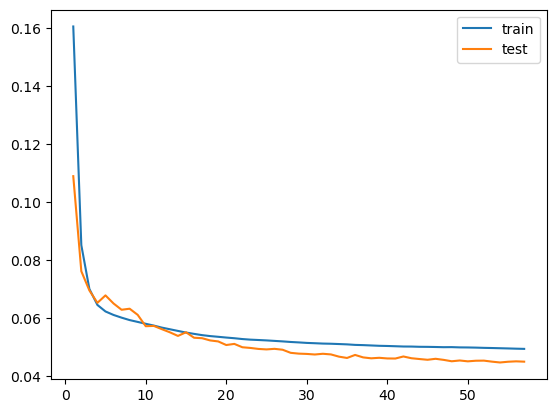

In [7]:
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], label="train")
plt.plot(range(1, len(hist.history['loss']) + 1),hist.history['val_loss'], label="test")
plt.legend()
plt.show()

In [8]:
encoder = Model(inputs=inp, outputs=Encoderoutput)
encoder.compile()
encoder.save('encoder.h5')

In [9]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
for i in range(100):
    gaussian.fit(X_train, y_train)
    print("Epoch: ",i )

y_pred = gaussian.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" %(100*accuracy_score(y_test, y_pred)))

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

In [10]:
from keras.models import load_model
feature_extract = load_model('encoder.h5')

In [11]:
X_train_encoded = feature_extract.predict(X_train)
X_test_encoded = feature_extract.predict(X_test)

313/313 [==============================] - 0s 1000us/step


In [12]:
gaussian_v2 = GaussianNB()
for i in range(300):
    gaussian_v2.fit(X_train_encoded, y_train)
    print("Epoch: ",i )

y_pred_v2 = gaussian_v2.predict(X_test_encoded)
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" %(100*accuracy_score(y_test, y_pred_v2)))

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define model
model = LogisticRegression(multi_class="ovr")
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

d:\anaconda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7379


In [15]:
# define the model
model = LogisticRegression(multi_class="ovr")
# fit the model on the training set
model.fit(X_train_encoded, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encoded)
acc = accuracy_score(y_test, yhat)
print(acc)

d:\anaconda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6361
